# Uticaj COVID-19 na socio-ekonomska kretanja u Crnoj Gori

## Jupyter Notebook skripta pisana u R

In [1]:
#postavljanje radne direktorije
#dataset.csv ili stavite u folderu "CG" na Vašem C disku, ili promijenite kod za vašu lokaciju
#google formu mozete naci na tiny.cc/CG_COVID19
setwd ("C:/CG") 

In [50]:
#importovanje i čitanje data seta 

anketa<-read.csv(
  file="dataset.csv",
  header=TRUE,
  sep=",",
  quote = "\"")  

In [82]:
#instaliranje i pokretanje potrebnih paketa 
#kako sam vec imao pakete instalirane samo ih pokrecem
#za samo instalaciju išle bi sledeće 3 linije
#install.packages("survival", repos='http://cran.us.r-project.org')
#install.packages("ggplot2", repos='http://cran.us.r-project.org')
#install.packages("Hmisc", repos='http://cran.us.r-project.org')
#install.packages("plotrix", repos='http://cran.us.r-project.org')
#svaka od njih se pokreće sa library(ime paketa), survival je potreban za Hmisc i ne pokreće se, a instalira prije Hmisc



library(ggplot2)
library(Hmisc)
library(plotrix)
library(tidyr)
library(dplyr)

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



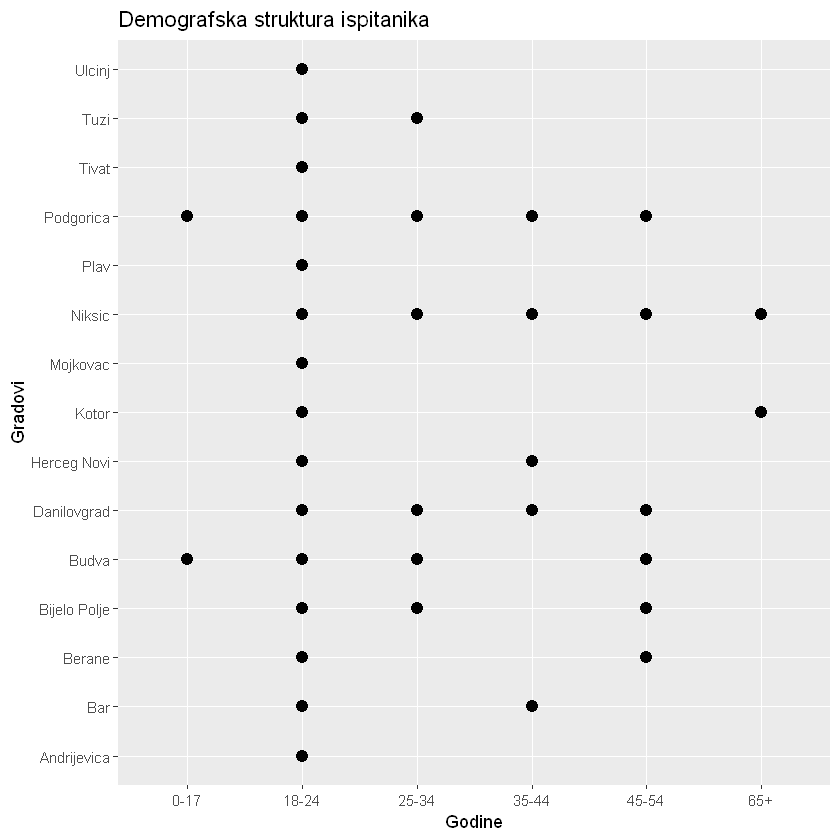

In [110]:
#pointchart koji prikazuje pretežnost određenih starosnih grupa po gradovima 

ggplot(data=anketa,
  aes(x=Vase.godine,y=Mjesto.prebivalista))+
  geom_point(size=3)+
  ggtitle("Demografska struktura ispitanika")+
  xlab("Godine")+
  ylab("Gradovi")

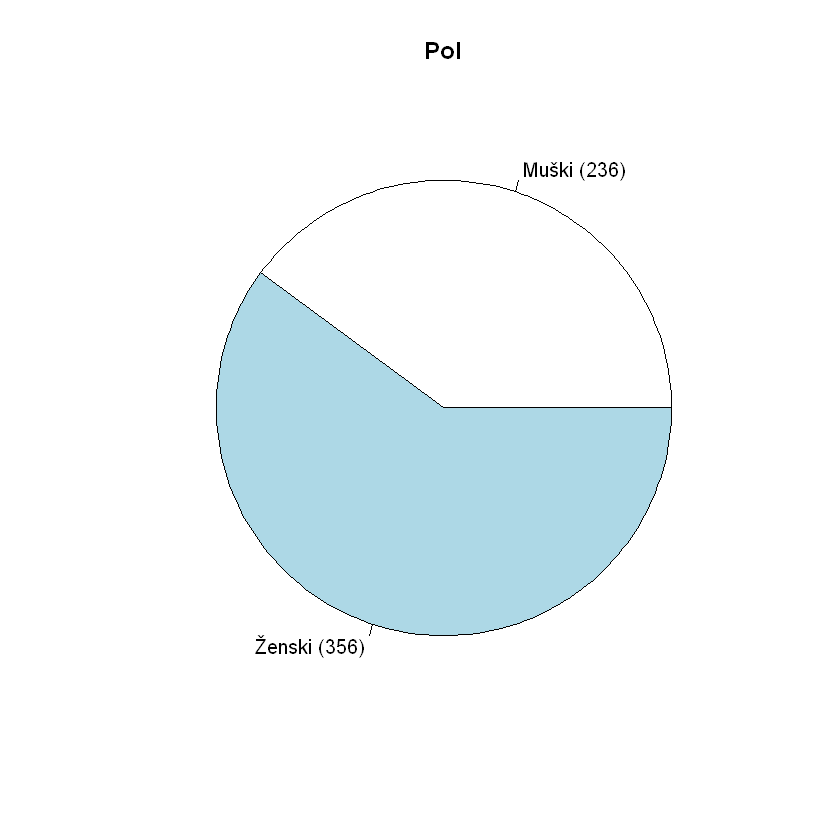

In [53]:
#piechart koji prikazuje statistiku polova

pol <- c(236,356)
pie(pol , labels = c("Muški (236)","Ženski (356)"), main="Pol")

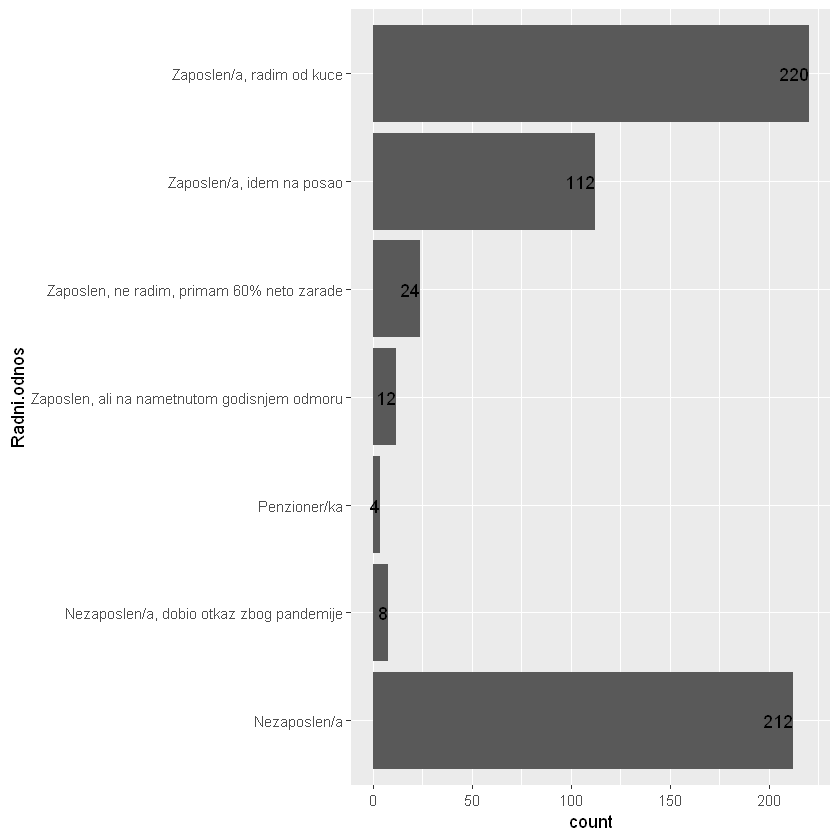

In [113]:
#histogram o radnom odnosu

ggplot(data=anketa,aes(y=Radni.odnos))+
  geom_bar()+ 
  geom_text(stat ='count',aes(label =..count.., hjust = 1))

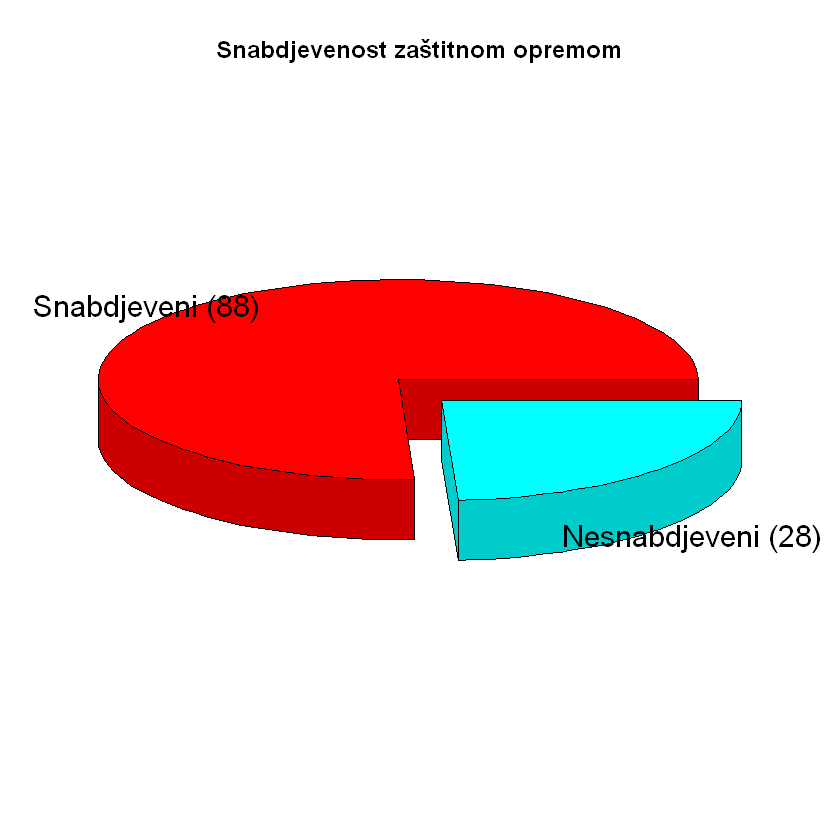

In [55]:
#exploding pie chart o snabdjevenosti zaštitnom opremom

slices <- c(88,28)
lbls <- c("Snabdjeveni (88)", "Nesnabdjeveni (28)")
pie3D(slices,labels=lbls,explode=0.1,
      main="Snabdjevenost zaštitnom opremom")

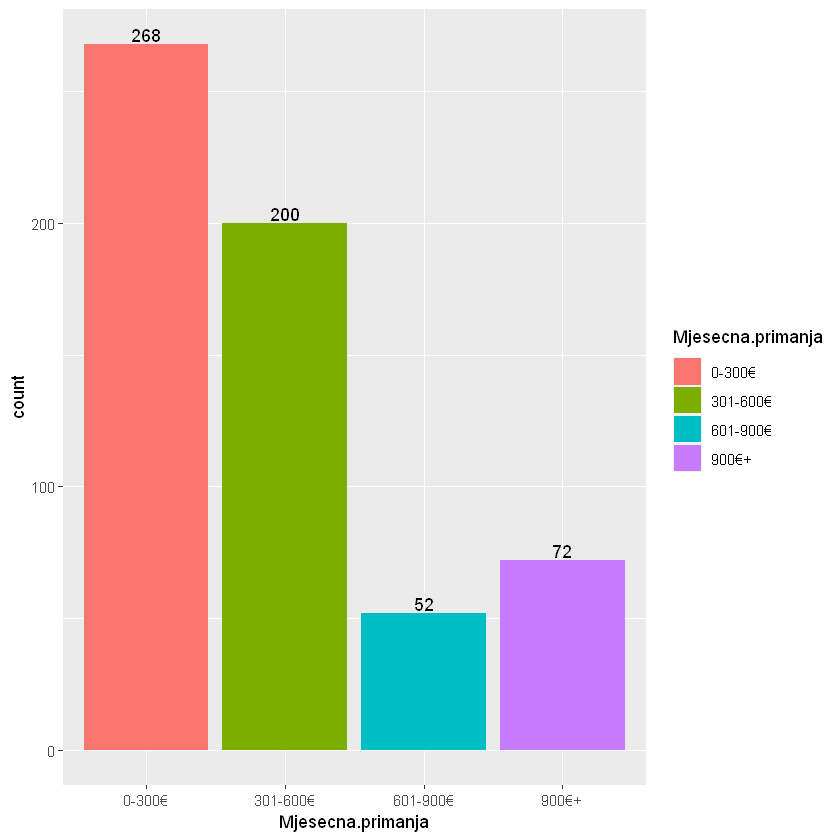

In [114]:
#mjesecna primanja
ggplot(data=anketa,aes(x=Mjesecna.primanja,fill=Mjesecna.primanja))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

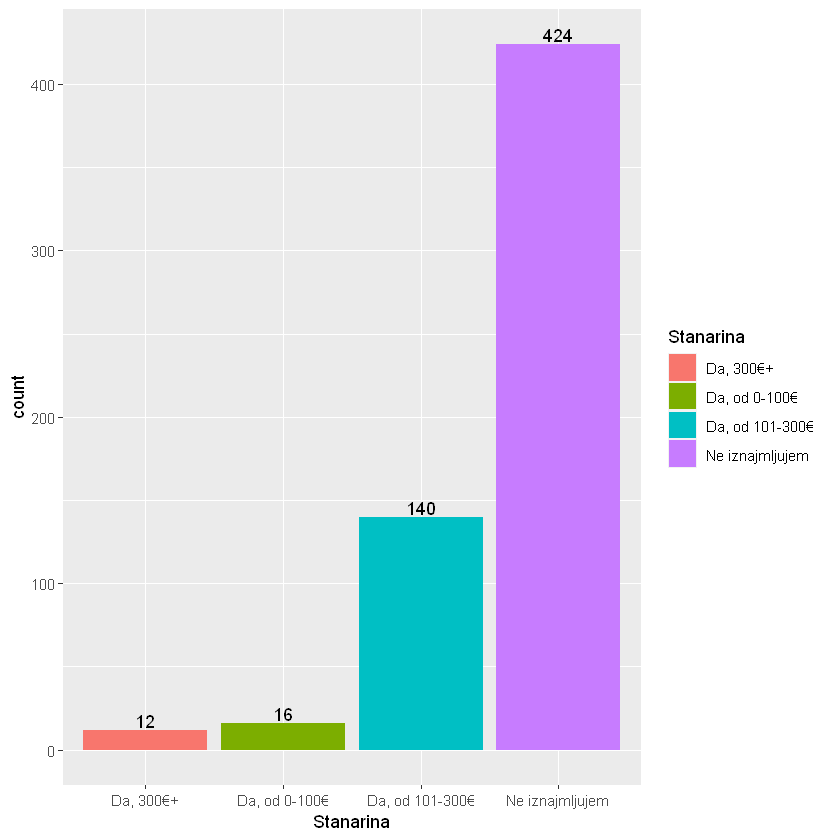

In [107]:
#Da li iznajmljujete mjesto gdje živite i koliko izdvajate na mjesečnom nivou?
ggplot(data=anketa,aes(x=Stanarina,fill=Stanarina))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

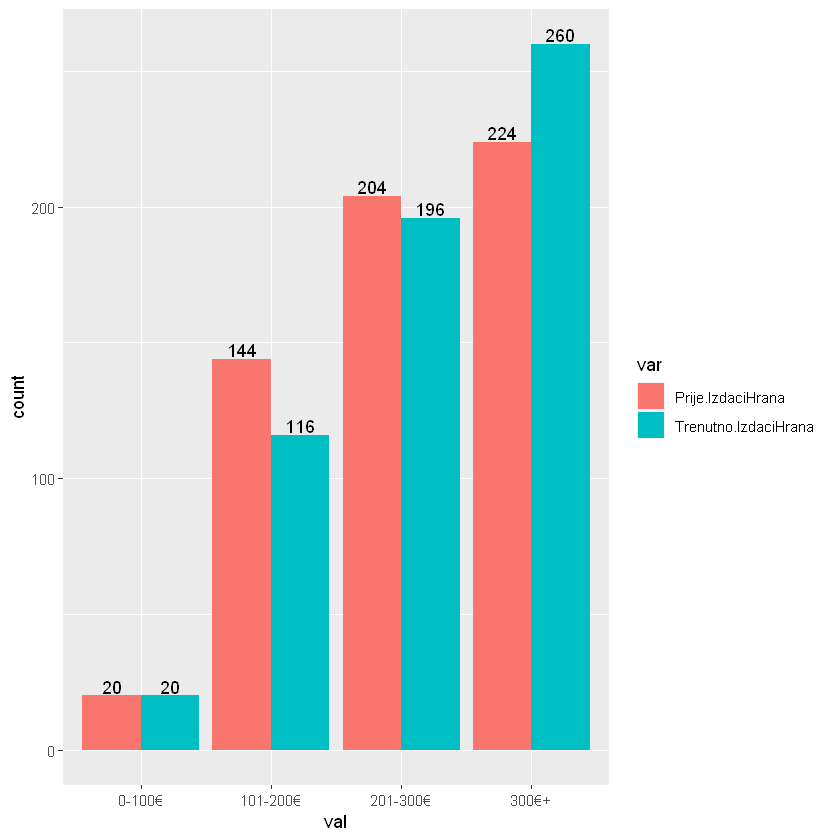

In [90]:
#uporedjivanje histograma prosle i sadasnje potrosnje hrane tokom pandemije
#te 2 kolone su eksportovane u repex.csv i radjeno je na tom fajlu, zato sto je u originalu pravio probleme

repex<-read.csv(
  file="repex.csv",
  header=TRUE,
  sep=",",
  quote = "\"")
repex %>% pivot_longer(everything(), names_to = "var", values_to = "val") %>%
  ggplot(aes(x = val, fill = var))+
  geom_bar(position = position_dodge())+
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.2, position = position_dodge(0.9))

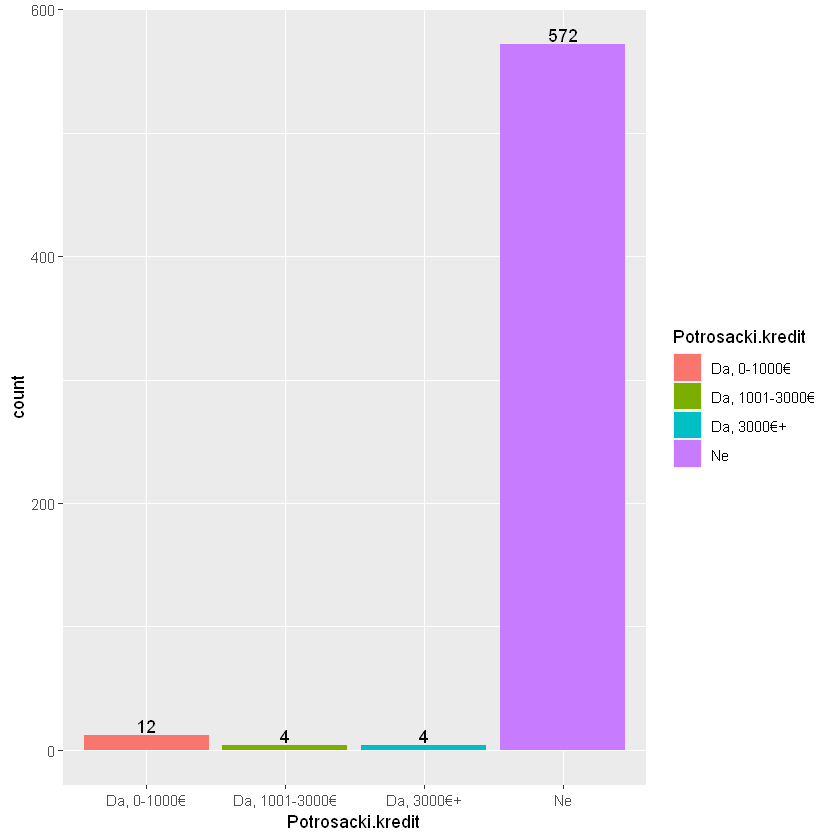

In [106]:
#Da li ste podigli portošacki kredit u martu/aprilu 2020 i u kojoj vrijednosti?
ggplot(data=anketa,aes(x=Potrosacki.kredit,fill=Potrosacki.kredit))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

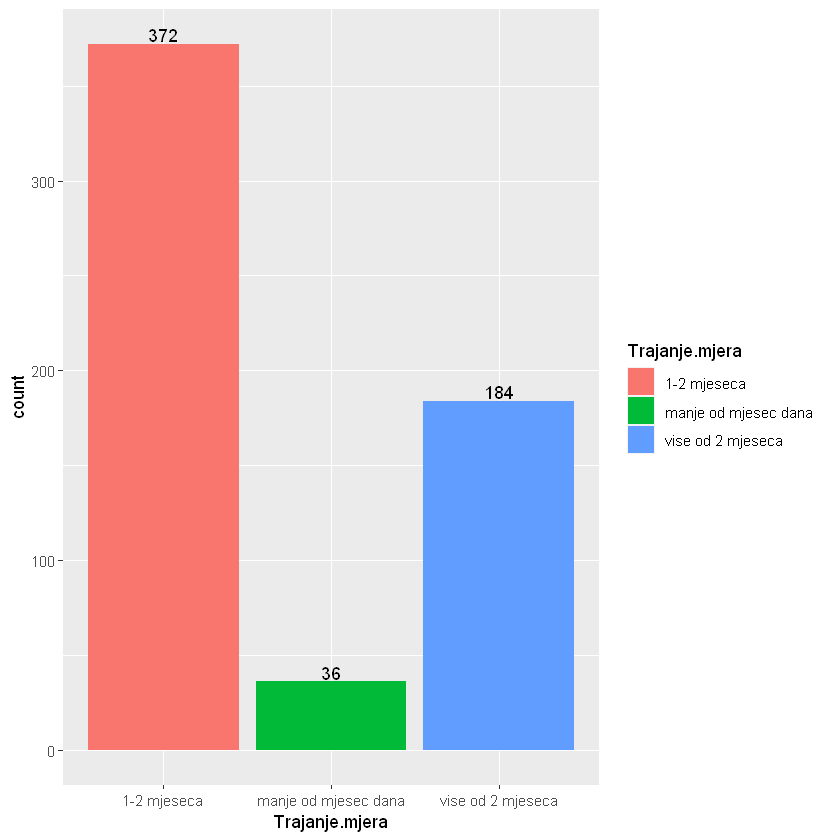

In [105]:
#Očekujem da će privremene mjere Vlade Crne Gore trajati:
ggplot(data=anketa,aes(x=Trajanje.mjera,fill=Trajanje.mjera))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

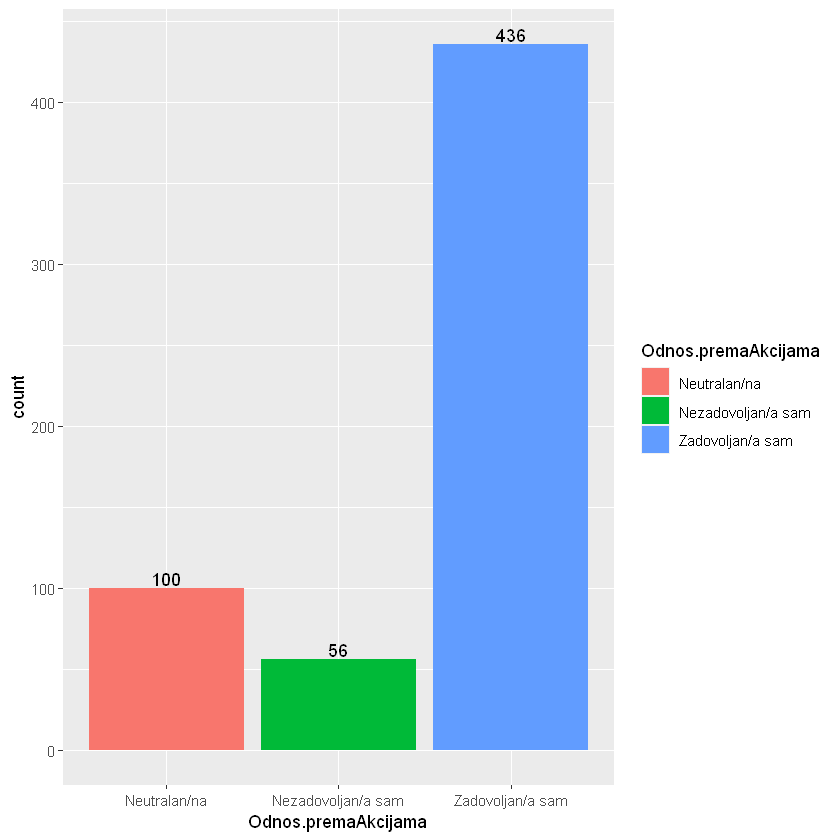

In [104]:
#Vaš odnos prema akcijama Vlade Crne Gore?
ggplot(data=anketa,aes(x=Odnos.premaAkcijama, fill=Odnos.premaAkcijama))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

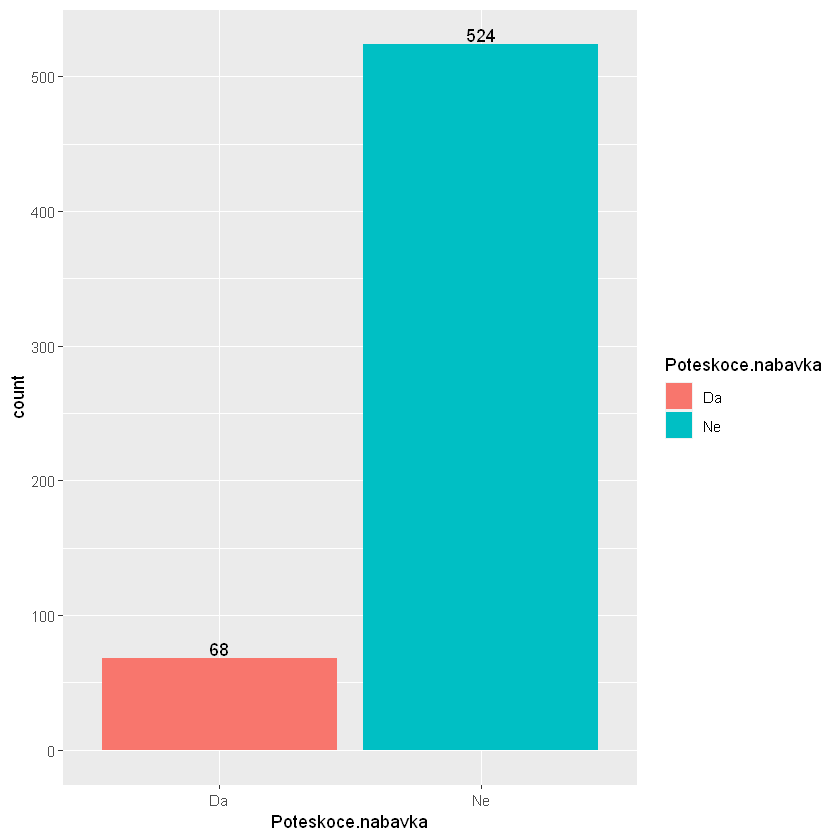

In [103]:
#Da li ste imali poteškoća pri nabavci osnovnih životnih namirnica?
ggplot(data=anketa,aes(x=Poteskoce.nabavka, fill=Poteskoce.nabavka))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

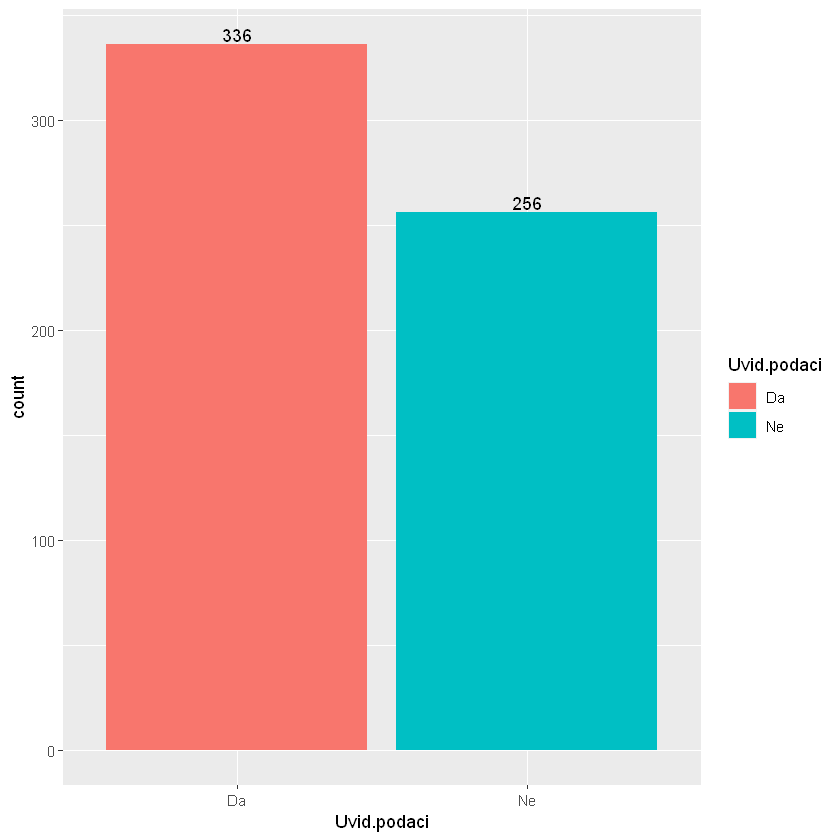

In [102]:
#Da li mislite da imate potpun uvid u naučne i statističke podatke u vezi sa COVID-19 u Crnoj Gori?
ggplot(data=anketa,aes(x=Uvid.podaci, fill=Uvid.podaci))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

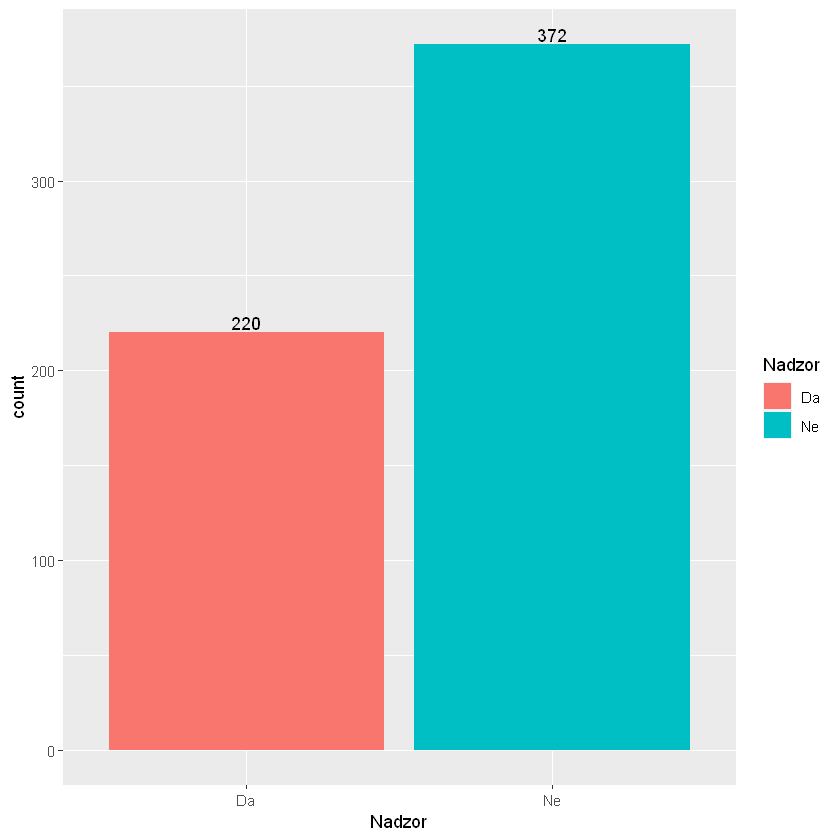

In [115]:
#Da li mislite da se vrši nedozvoljeni nadzor nad stanovništvom Crne Gore? (snimanje dronovima, pristup privatnim podacima)
ggplot(data=anketa,aes(x=Nadzor, fill=Nadzor))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

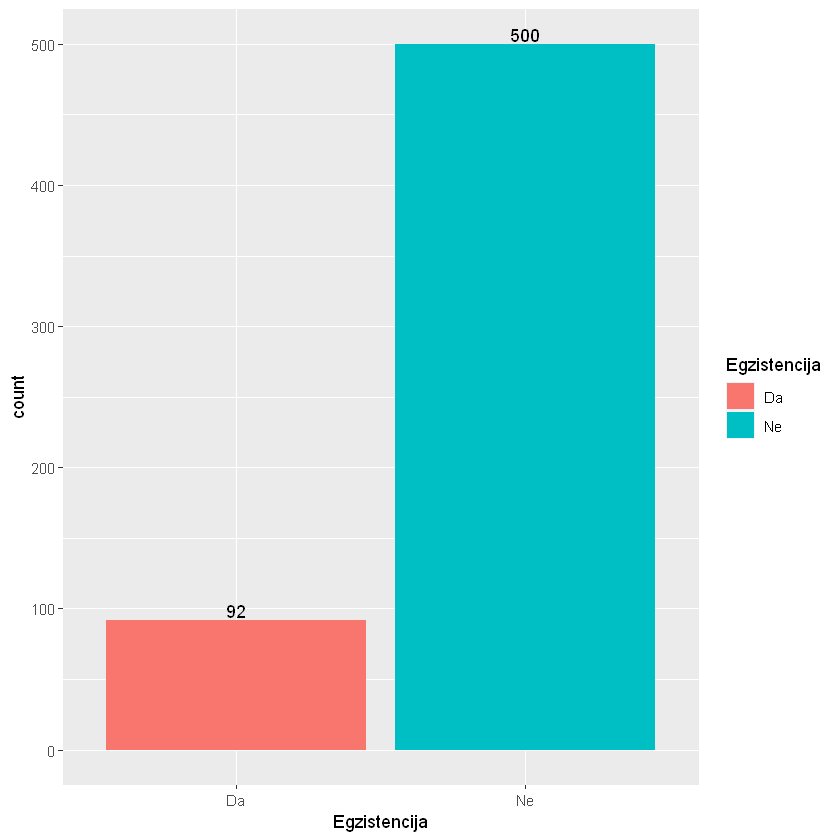

In [116]:
#Da li mislite da je ugrožena vaša egzistencija zbog mjera koje je uvela Vlada Crne Gore?
ggplot(data=anketa,aes(x=Egzistencija, fill=Egzistencija))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

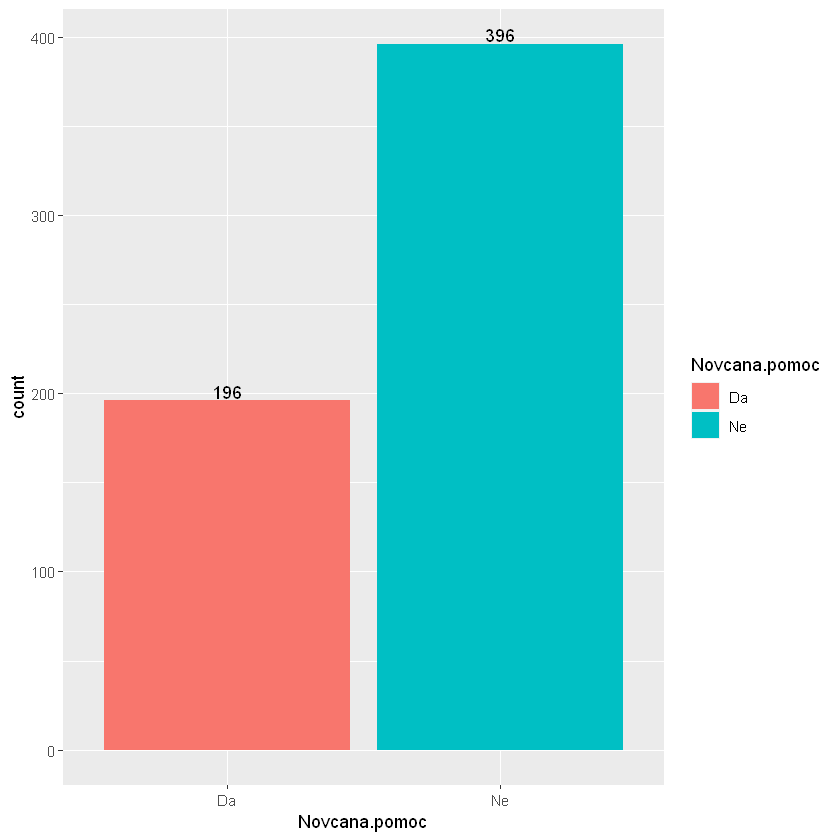

In [117]:
#Da li Vam je neophodna Vladina novčana pomoć u vrijeme pandemije COVID-19?
ggplot(data=anketa,aes(x=Novcana.pomoc, fill=Novcana.pomoc))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

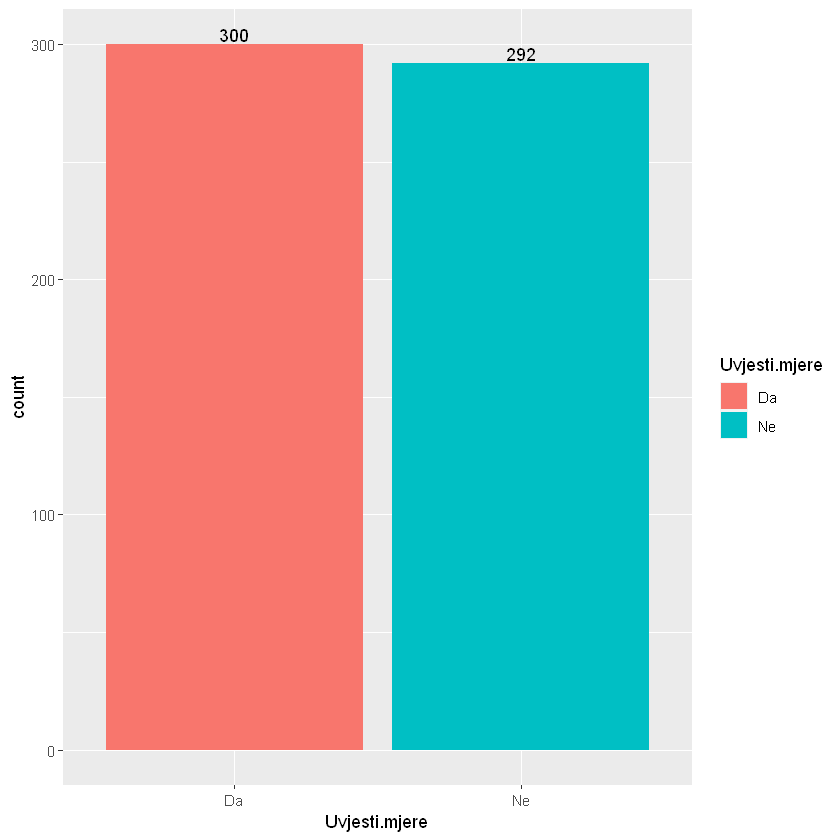

In [118]:
#Da li mislite da je potrebno uvesti rigoroznije mjere?
ggplot(data=anketa,aes(x=Uvjesti.mjere, fill=Uvjesti.mjere))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

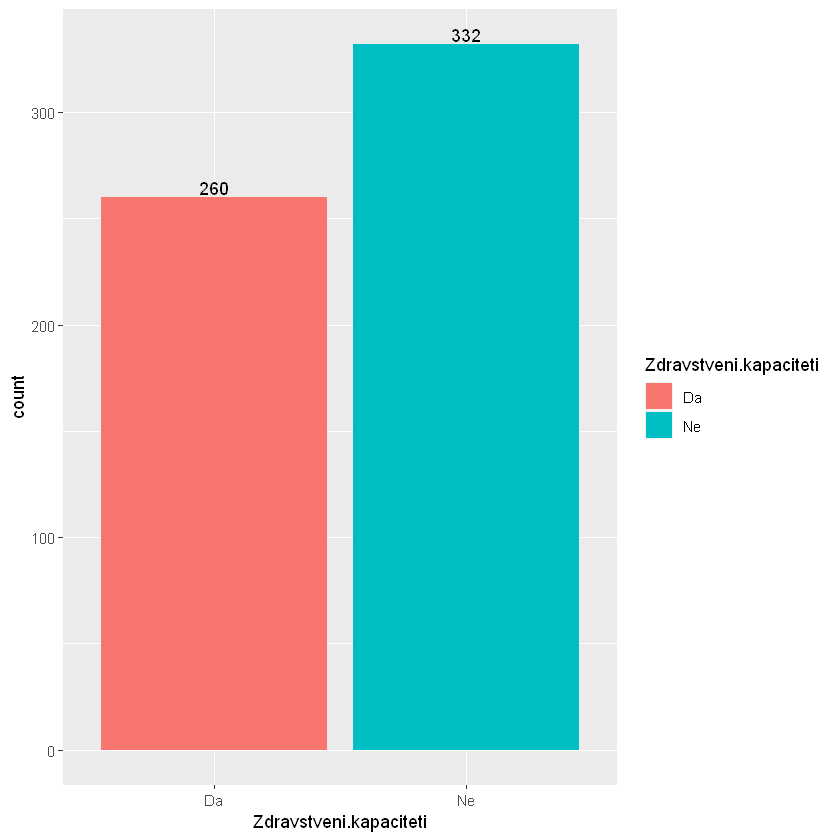

In [119]:
#Da li mislite da naši zdravstveni kapaciteti i oprema mogu da zadovolje potrebe u vrijeme pandemije COVID-19?
ggplot(data=anketa,aes(x=Zdravstveni.kapaciteti, fill=Zdravstveni.kapaciteti))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

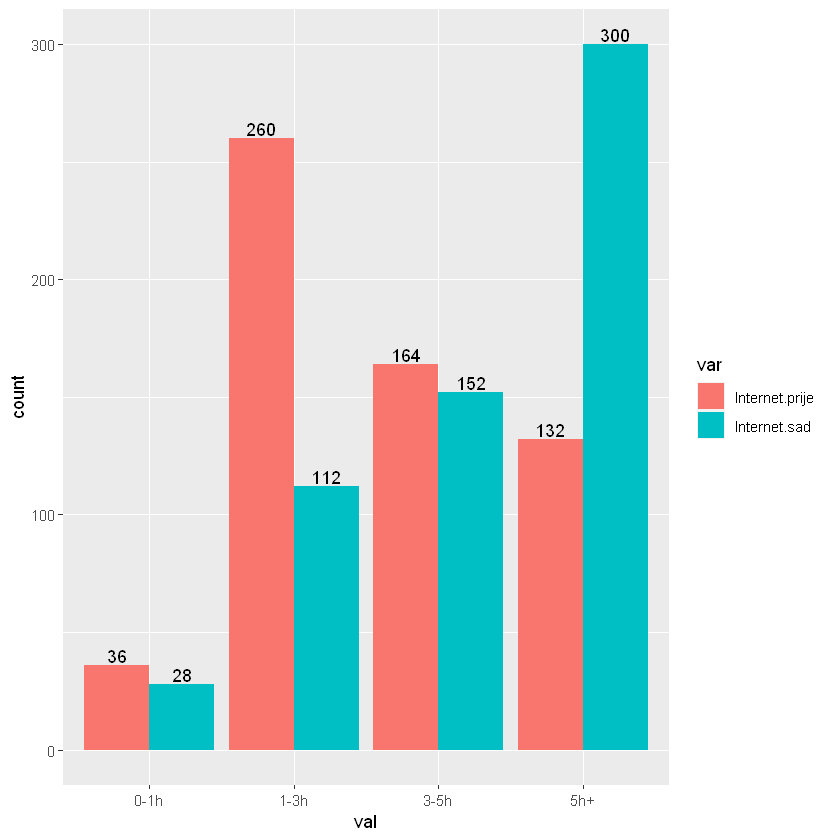

In [121]:
#uporedjivanje provedenog vremena na internetu prije pandemije i tokom
internet<-read.csv(
  file="internet.csv",
  header=TRUE,
  sep=",",
  quote = "\"")
internet %>% pivot_longer(everything(), names_to = "var", values_to = "val") %>%
  ggplot(aes(x = val, fill = var))+
  geom_bar(position = position_dodge())+
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.2, position = position_dodge(0.9))

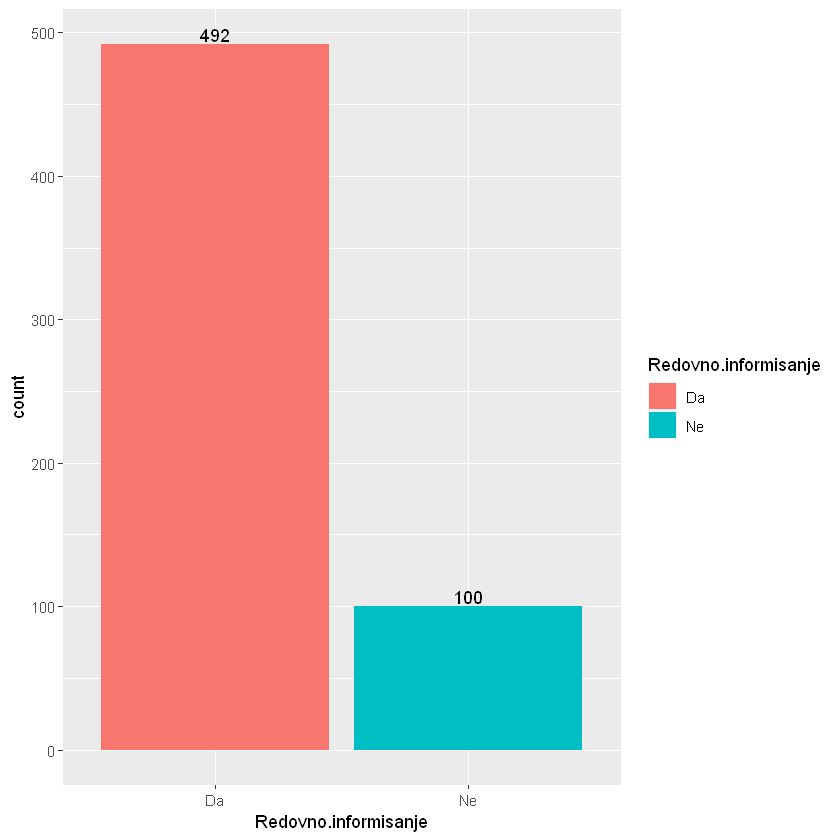

In [124]:
#Da li se redovno informišete o stanju pandemije COVID-19 u svijetu?
ggplot(data=anketa,aes(x=Redovno.informisanje, fill=Redovno.informisanje))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

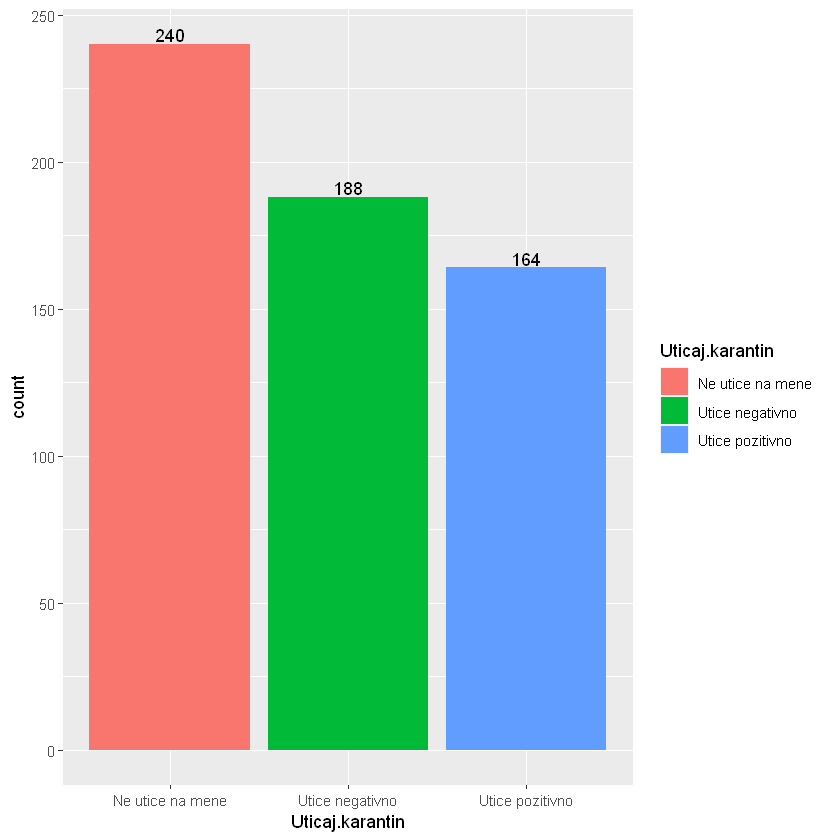

In [125]:
#Kako na Vas utiče karantin?
ggplot(data=anketa,aes(x=Uticaj.karantin, fill=Uticaj.karantin))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

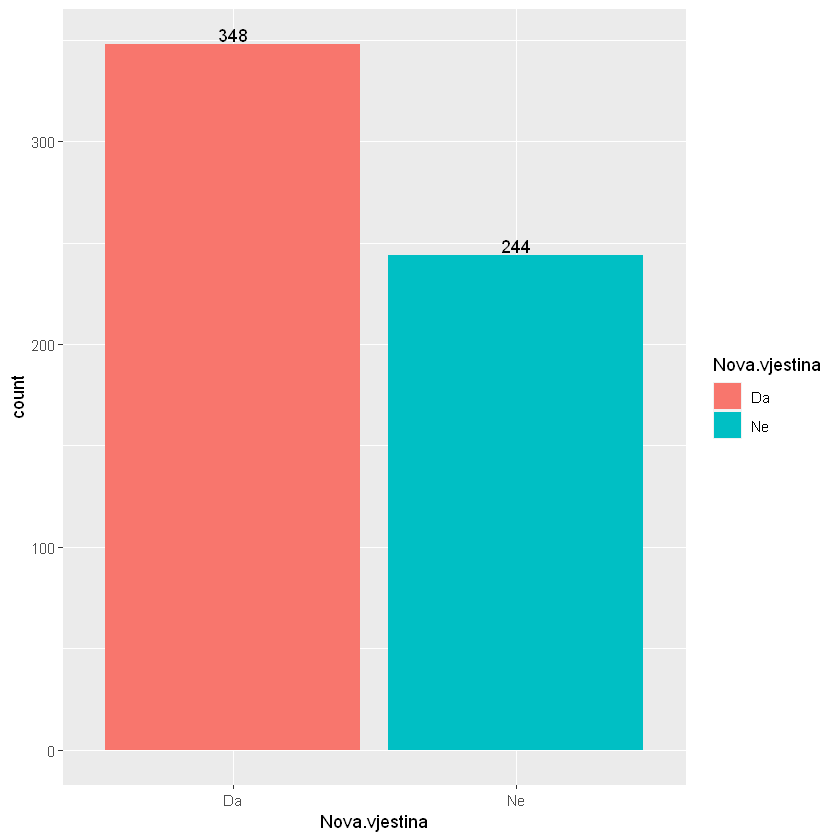

In [126]:
#Da li ste savladali neku novu vještinu u vrijeme izolacije?
ggplot(data=anketa,aes(x=Nova.vjestina, fill=Nova.vjestina))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))

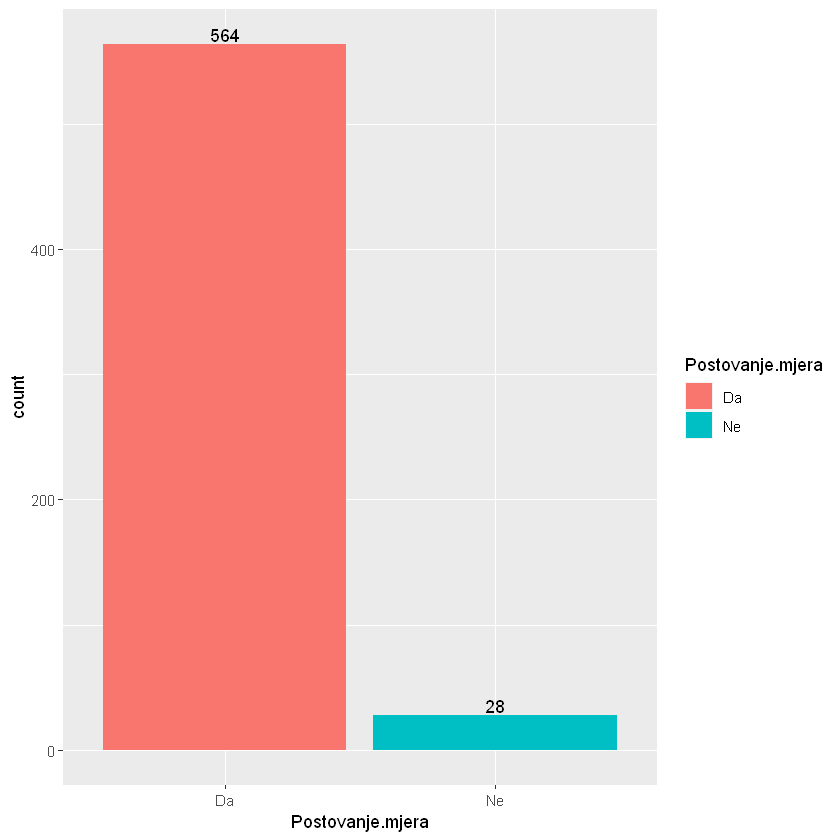

In [127]:
#Da li poštujete mjere Vlade Crne Gore u potpunosti?
ggplot(data=anketa,aes(x=Postovanje.mjera, fill=Postovanje.mjera))+
  geom_bar()+
  geom_text(stat ='count',aes(label =..count.., vjust = -0.2))